# Практическая работа №3: Исследование задач о раскрасках

Выполнил студент гр. 1304 Шаврин Алексей. Вариант №52.

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках,привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

### Действие группы на множество
Пусть $G$ - группа с нейтральным элементом $e$, a $X$ - множество. Будем говорить, что $G$ действует на $X$, если задана операция $G \times X \rightarrow X$.   
$\forall$ $x \in X$ и $g, h \in G$, при том:
<ol>
<li>$ex = x$</li>
<li>$g(h(x)) = gh(x)$</li>
</ol>


### Орбита
Орбитой элемента $x \in X$ под действием $G$ называется множество  
$Gx = \{gx : g \in G\}$
Длина орбиты - количество элементов в ней, обозначается $\#G$

### Неподвижные точки
Неподвижными точками элемента $g \in G$ называются $x \in X : gx = x$<br>
Множество неподвижных точек элемента $g$ обозначается $X^g$

### Лемма Бернсайда
Количество орбит действия группы $G$ на множестве $X$ равно  
$\frac{1}{\#G}\sum_{g \in G} \#X^{g}$

### Определение раскраски
Пусть $I$ - произвольное множество, а $C$ - множество цветов. Раскраской множества $I$ называется функция из $I$ в $C$. Множество всех раскрасок обозначается через $C^I$, количество раскрасок равно $\#C^{\#I}$ 

### Количество раскрасок
Количество раскрасок из $C^I$, которые сохраняют данный элемент $g \in G$ равно $\#C^{c(\varphi(g)))}$  
$с(\varphi(g))$ - количество независимых циклов перестановки $\varphi(g)$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Условие задачи
Каждая сторона квадрата разбита на 9 равных частей и через точки деления проведены отрезки, параллельные сторонам квадрата. В получившиеся клаточки вставляют цветные стекла 3 различных цветов. Сколькими способами можно составить такую мозаику (с точностью до поворота и осевых симметрий квадрата).

### 1) Аналитическое решение (Лемма Бернсайда)

1) Обозначим множество квадратиков, на которые разбит наш квадрат как $I = ${$i_1, i_2, ..., i_{81}$}, где $i_j = j \in [1, 81]$, а множество цветов как $C = ${$c_1, c_2, c_3$}.<br> Всего существует $3^{81}$ раскрасок, однако не все различны с точностью до поворота и осевых симметрий.<br><br> 
Для наглядности реализуем следующий функционал <em>create_matrix</em> - создает матрицу пронумерованных квадратиков и <em>print_matrix</em> - выводит переданную матрицу, <em>rotate_matrix</em> - поворачивает матрицу на заданный угол, <em>mirror_matrix</em> - отражает матрицу относительно переданой оси (вертикали, горизонтали, главной диагонали или побочной диагонали). Функции <em>test_rotate</em> и <em>test_mirror</em> реализуют тесты для поворотов и отражений матрицы. Некоторые функции имеют функционал для работы 2-го пункта работы.

In [481]:
from copy import deepcopy

In [482]:
def create_matrix(matrix_size: int) -> list[list[int]]:
    """
    Функция создания матрицы matrix_size на matrix_size, с пронумерованными элементами
    """
    
    matrix = []
    counter = 1
    for row in range(matrix_size):
        current_row = []
        for column in range(matrix_size): 
            current_row.append(counter)
            counter += 1
        matrix.append(current_row)
    return matrix

In [483]:
def print_matrix(matrix: list[list[int]], matrix_type: str="Classic") -> None:
    """
    Функция вывода матрицы
    """
    
    if matrix_type == "Classic":
        for row in matrix:
            print(*row, sep=' ')
    if matrix_type == "Coloring":
        matrix_plot(matrix, vmin=0, vmax=2, cmap="tab10").show()

In [484]:
def rotate_matrix(matrix: list[list[int]], degree: int=0) -> list[list[int]]:
    """
    Функция поворота матрицы на 90 градусов
    """
    
    rotated_matrix = deepcopy(matrix)
    if degree in [0, 90, 180, 270, 360]:
        while degree != 0:
            rotated_matrix = [list(reversed(col)) for col in zip(*rotated_matrix)]
            degree -= 90
    return rotated_matrix
        

In [485]:
def mirror_matrix(matrix: list[list[int]], asix: str) -> list[list[int]]: 
    """
    Функция отражения матрицы по заданой оси
    """
    
    mr_matrix = deepcopy(matrix)
    if asix in ["vertical", "horizontal", "main_diagonal", "side_diagonal"]:
        if asix == "main_diagonal":
            mr_matrix = rotate_matrix(mr_matrix, 90)
            
        if asix == "horizontal":
            mr_matrix = rotate_matrix(mr_matrix, 180)
                
        if asix == "side_diagonal":
            mr_matrix = rotate_matrix(mr_matrix, 270)
            
        for i in range(len(matrix)):
            mr_matrix[i] = mr_matrix[i][::-1]
        
    return mr_matrix

In [486]:
def test_rotate(matrix: list[list[int]], test_type: str="Classic") -> None:
    """
    Функция, реализующая тест поворотов матрицы
    """
    
    for degree in [90, 180, 270, 360]:
        print(f"{degree} degree rotation")
        print_matrix(rotate_matrix(matrix, degree), matrix_type=test_type)
        print()

In [487]:
def test_mirror(matrix: list[list[int]], test_type: str="Classic") -> None:
    """
    Функция, реализующая тест отражений матрицы
    """
    
    for asix in ["vertical", "main_diagonal", "horizontal", "side_diagonal"]:
        print(f"{asix} asix mirror")
        print_matrix(mirror_matrix(matrix, asix), matrix_type=test_type)
        print()

In [488]:
matrix = create_matrix(9)
print_matrix(matrix)

1 2 3 4 5 6 7 8 9
10 11 12 13 14 15 16 17 18
19 20 21 22 23 24 25 26 27
28 29 30 31 32 33 34 35 36
37 38 39 40 41 42 43 44 45
46 47 48 49 50 51 52 53 54
55 56 57 58 59 60 61 62 63
64 65 66 67 68 69 70 71 72
73 74 75 76 77 78 79 80 81


Для более удобного представления запишем ее в MARKDOWN стиле

M = 
$\left[
 \begin{matrix}
    1&2&3&4&5&6&7&8&9\\
    10&11&12&13&14&15&16&17&18\\
    19&20&21&22&23&24&25&26&27\\
    28&29&30&31&32&33&34&35&36\\
    37&38&39&40&41&42&43&44&45\\
    46&47&48&49&50&51&52&53&54\\
    55&56&57&58&59&60&61&62&63\\
    64&65&66&67&68&69&70&71&72\\
    73&74&75&76&77&78&79&80&81
  \end{matrix} 
\right]$

2) Пусть $\tau$ - поворот на $90^o$. Рассмотрим повороты:
<ol>
    <li>На $90^o$ ($\tau$):<br>
        $\tau$ = (1, 9, 81, 73)(2, 18, 80, 64)...(31,33,51,49)(41) - всего 21 цикл</li><br>
    <li>На $180^o$ ($\tau^2$):<br>
        $\tau^2$ = (1, 81)(2, 80)...(31,51)(41) - всего 41 цикл</li><br>
    <li>На $270^o$ ($\tau^3$):<br>
        $\tau^3$ = (1,73,81,9)(2,64,80,18)...(31,49,51,33)(41) - всего 21 цикл</li><br>
    <li>На $360^o$ ($\tau^4$ = $e$) - тождественное преобразование:<br>   
        $e =\tau^4$ = (1)(2)...(81) - всего 81 цикл</li><br>
</ol>
Ниже представлено графическое представление, подтверждающее аналитические рассуждения.

In [489]:
matrix = create_matrix(9)
test_rotate(matrix)

90 degree rotation
73 64 55 46 37 28 19 10 1
74 65 56 47 38 29 20 11 2
75 66 57 48 39 30 21 12 3
76 67 58 49 40 31 22 13 4
77 68 59 50 41 32 23 14 5
78 69 60 51 42 33 24 15 6
79 70 61 52 43 34 25 16 7
80 71 62 53 44 35 26 17 8
81 72 63 54 45 36 27 18 9

180 degree rotation
81 80 79 78 77 76 75 74 73
72 71 70 69 68 67 66 65 64
63 62 61 60 59 58 57 56 55
54 53 52 51 50 49 48 47 46
45 44 43 42 41 40 39 38 37
36 35 34 33 32 31 30 29 28
27 26 25 24 23 22 21 20 19
18 17 16 15 14 13 12 11 10
9 8 7 6 5 4 3 2 1

270 degree rotation
9 18 27 36 45 54 63 72 81
8 17 26 35 44 53 62 71 80
7 16 25 34 43 52 61 70 79
6 15 24 33 42 51 60 69 78
5 14 23 32 41 50 59 68 77
4 13 22 31 40 49 58 67 76
3 12 21 30 39 48 57 66 75
2 11 20 29 38 47 56 65 74
1 10 19 28 37 46 55 64 73

360 degree rotation
1 2 3 4 5 6 7 8 9
10 11 12 13 14 15 16 17 18
19 20 21 22 23 24 25 26 27
28 29 30 31 32 33 34 35 36
37 38 39 40 41 42 43 44 45
46 47 48 49 50 51 52 53 54
55 56 57 58 59 60 61 62 63
64 65 66 67 68 69 70 71 72
73 74 75 

Для более удобного представления запишем их в MARKDOWN стиле

$\tau(M)$ = 
$\left[
 \begin{matrix}
    73&64&55&46&37&28&19&10&1\\
    74&65&56&47&38&29&20&11&2\\
    75&66&57&48&39&30&21&12&3\\
    76&67&58&49&40&31&22&13&4\\
    77&68&59&50&41&32&23&14&5\\
    78&69&60&51&42&33&24&15&6\\
    79&70&61&52&43&34&25&16&7\\
    80&71&62&53&44&35&26&17&8\\
    81&72&63&54&45&36&27&18&9
  \end{matrix} 
\right]$
$\tau^2(M)$ = 
$\left[
 \begin{matrix}
    81&80&79&78&77&76&75&74&73\\
    72&71&70&69&68&67&66&65&64\\
    63&62&61&60&59&58&57&56&55\\
    54&53&52&51&50&49&48&47&46\\
    45&44&43&42&41&40&39&38&37\\
    36&35&34&33&32&31&30&29&28\\
    27&26&25&24&23&22&21&20&19\\
    18&17&16&15&14&13&12&11&10\\
    9&8&7&6&5&4&3&2&1
  \end{matrix} 
\right]$<br><br>
$\tau^3(M)$ = 
$\left[
 \begin{matrix}
    9&18&27&36&45&54&63&72&81\\
    8&17&26&35&44&53&62&71&80\\
    7&16&25&34&43&52&61&70&79\\
    6&15&24&33&42&51&60&69&78\\
    5&14&23&32&41&50&59&68&77\\
    4&13&22&31&40&49&58&67&76\\
    3&12&21&30&39&48&57&66&75\\
    2&11&20&29&38&47&56&65&74\\
    1&10&19&28&37&46&55&64&73
  \end{matrix} 
\right]$
$M = \tau^4(M)$ = 
$\left[
 \begin{matrix}
    1&2&3&4&5&6&7&8&9\\
    10&11&12&13&14&15&16&17&18\\
    19&20&21&22&23&24&25&26&27\\
    28&29&30&31&32&33&34&35&36\\
    37&38&39&40&41&42&43&44&45\\
    46&47&48&49&50&51&52&53&54\\
    55&56&57&58&59&60&61&62&63\\
    64&65&66&67&68&69&70&71&72\\
    73&74&75&76&77&78&79&80&81\\
  \end{matrix} 
\right]$

3) Пусть $\sigma$ - вертикальная осевая симетрия. Рассмотрим cимметрии:
<ol>
    <li>$\sigma$ - вертикальная симметрия:<br>
        $\sigma$ = (1, 9)(2, 8)...(76,78)(5)(14)(23)(32)(41)(50)(59)(68)(77) - всего 45 циклов</li><br>
    <li>$\sigma(\tau)$ - симметрия относительно главной диагонали:<br>
        $\sigma(\tau)$ = (1)(11)(21)(31)(41)(51)(61)(71)(81)(2,10)(3, 19)...(72,80) - всего 45 циклов</li><br>
    <li>$\sigma(\tau^2)$ - горизонтальная симметрия:<br>
        $\sigma(\tau^2)$ = (1, 73)(2, 74)...(36,54)(37)(38)(39)(40)(41)(42)(43)(44)(45) - всего 45 циклов</li><br>
    <li>$\sigma(\tau^3)$ - симметрия относительно побочной диагонали:<br>
        $\sigma(\tau^3)$ = (1,81)(2,72)...(31,51)(9)(17)(25)(33)(41)(49)(57)(65)(73) - всего 45 циклов</li><br>
</ol>
Ниже представлено графическое представление, подтверждающее аналитические рассуждения.

In [490]:
matrix = create_matrix(9)
test_mirror(matrix)

vertical asix mirror
9 8 7 6 5 4 3 2 1
18 17 16 15 14 13 12 11 10
27 26 25 24 23 22 21 20 19
36 35 34 33 32 31 30 29 28
45 44 43 42 41 40 39 38 37
54 53 52 51 50 49 48 47 46
63 62 61 60 59 58 57 56 55
72 71 70 69 68 67 66 65 64
81 80 79 78 77 76 75 74 73

main_diagonal asix mirror
1 10 19 28 37 46 55 64 73
2 11 20 29 38 47 56 65 74
3 12 21 30 39 48 57 66 75
4 13 22 31 40 49 58 67 76
5 14 23 32 41 50 59 68 77
6 15 24 33 42 51 60 69 78
7 16 25 34 43 52 61 70 79
8 17 26 35 44 53 62 71 80
9 18 27 36 45 54 63 72 81

horizontal asix mirror
73 74 75 76 77 78 79 80 81
64 65 66 67 68 69 70 71 72
55 56 57 58 59 60 61 62 63
46 47 48 49 50 51 52 53 54
37 38 39 40 41 42 43 44 45
28 29 30 31 32 33 34 35 36
19 20 21 22 23 24 25 26 27
10 11 12 13 14 15 16 17 18
1 2 3 4 5 6 7 8 9

side_diagonal asix mirror
81 72 63 54 45 36 27 18 9
80 71 62 53 44 35 26 17 8
79 70 61 52 43 34 25 16 7
78 69 60 51 42 33 24 15 6
77 68 59 50 41 32 23 14 5
76 67 58 49 40 31 22 13 4
75 66 57 48 39 30 21 12 3
74 65 56 47 38 29

Для более удобного представления запишем их в MARKDOWN стиле

$\sigma(M)$ = 
$\left[
 \begin{matrix}
    9&8&7&6&5&4&3&2&1\\
    18&17&16&15&14&13&12&11&10\\
    27&26&25&24&23&22&21&20&19\\
    36&35&34&33&32&31&30&29&28\\
    45&44&43&42&41&40&39&38&37\\
    54&53&52&51&50&49&48&47&46\\
    63&62&61&60&59&58&57&56&55\\
    72&71&70&69&68&67&66&65&64\\
    81&80&79&78&77&76&75&74&73
  \end{matrix} 
\right]$
$\sigma(\tau(M))$ = 
$\left[
 \begin{matrix}
    1&10&19&28&37&46&55&64&73\\
    2&11&20&29&38&47&56&65&74\\
    3&12&21&30&39&48&57&66&75\\
    4&13&22&31&40&49&58&67&76\\
    5&14&23&32&41&50&59&68&77\\
    6&15&24&33&42&51&60&69&78\\
    7&16&25&34&43&52&61&70&79\\
    8&17&26&35&44&53&62&71&80\\
    9&18&27&36&45&54&63&72&81
  \end{matrix} 
\right]$<br><br>
$\sigma(\tau^2(M))$ = 
$\left[
 \begin{matrix}
    73&74&75&76&77&78&79&80&81\\
    64&65&66&67&68&69&70&71&72\\
    55&56&57&58&59&60&61&62&63\\
    46&47&48&49&50&51&52&53&54\\
    37&38&39&40&41&42&43&44&45\\
    28&29&30&31&32&33&34&35&36\\
    19&20&21&22&23&24&25&26&27\\
    10&11&12&13&14&15&16&17&18\\
    1&2&3&4&5&6&7&8&9
  \end{matrix} 
\right]$
$\sigma(\tau^3(M))$ = 
$\left[
 \begin{matrix}
    81&72&63&54&45&36&27&18&9\\
    80&71&62&53&44&35&26&17&8\\
    79&70&61&52&43&34&25&16&7\\
    78&69&60&51&42&33&24&15&6\\
    77&68&59&50&41&32&23&14&5\\
    76&67&58&49&40&31&22&13&4\\
    75&66&57&48&39&30&21&12&3\\
    74&65&56&47&38&29&20&11&2\\
    73&64&55&46&37&28&19&10&1
  \end{matrix} 
\right]$

4) Вычислим стабилизаторы (количество раскрасок образуемых каждым элементом из группы действий (вращений) $G$): ($|C|$ - количество цветов.)
<ol>
    <li>$Stab_{|C|}(\tau) = Stab_{|C|}(\tau^3) = 3^{21}$</li>
    <li>$Stab_{|C|}(\tau^2) = 3^{41}$</li>
    <li>$Stab_{|C|}(\tau^4) = 3^{81}$</li>
    <li>$Stab_{|C|}(\sigma) = Stab_{|C|}(\sigma(\tau)) = Stab_{|C|}(\sigma(\tau^2)) = Stab_{|C|}(\sigma(\tau^3))  = 3^{45}$</li>
        
</ol>

5) По лемме Бернсайда: $N$ = $\frac{1}{|G|}$ * $\sum_{g \in G}{Stab_{|C|}(g)}$, где $G$ - множество всех действий (вращений), $|G|$ - количество действий (вращений), $g$ - действие (вращение), а $|C|$ - количество цветов.<br>
$N$ = $\frac{1}{8}$ * $(2 * 3^{21} + 3^{41} + 3^{81} + 4 * 3^{45}) = 5.54283110*10^{37}$

#### Вывод

Таким образом, посчитали способы раскраски матрицы 9 на 9 используя краски 3 цветов с точностью до поворотов применяя данные из теоретических положений, в частности лемму Бернсайда.

### 2) Графическое представление раскраски

Для графического составления раскраски с заданным номером реализуем функцию <em>create_coloring_matrix</em> - создающую раскрашенную матрицу по заданному номеру раскраски.

In [491]:
def create_coloring_matrix(coloring_number: int, count_colors: int=3, matrix_size: int=9) -> list[list[int]]:
    """
    Функция, которая строит раскраску по переданному номеру для данной задачи.
    """
    
    count_cells = matrix_size * matrix_size
    if (coloring_number < 0) or (coloring_number > count_colors ** (count_cells)): # Проверка корректности номера раскраски
        print("Не корректный номер раскраски")
        return [[0]]
    
    # Создание списка цветов для каждого квадратика (индекс - номер квадратика, значения - цвет)
    coloring = list(reversed(coloring_number.digits(count_colors))) # Рассчет раскраски по номеру
    coloring = [0] * (count_cells - len(coloring)) + coloring # Дополнение первых не значащих нулей (до 81 элемента)
    
    coloring_matrix = [coloring[i: i + matrix_size] for i in range(0, (count_cells - matrix_size) + 1, matrix_size)] # Создание матрицы для отображения
    
    return coloring_matrix

Рассмотрим пример работы программы на нескольких значениях номеров раскрасски. А также продемонстрируем повороты и отражения данных раскрасок.

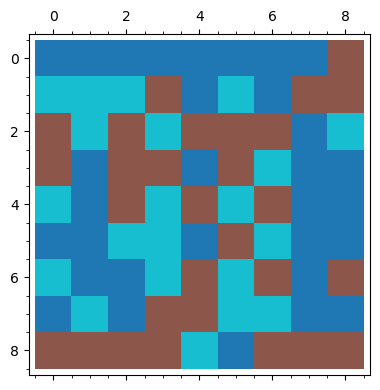

In [492]:
# Test 1

print_matrix(create_coloring_matrix(7**41), matrix_type="Coloring")

90 degree rotation


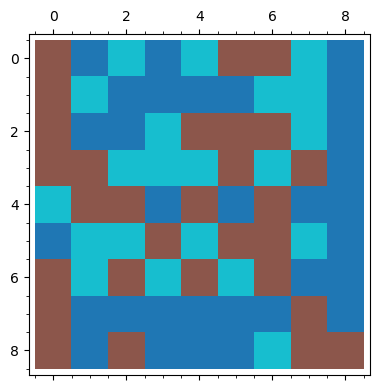


180 degree rotation


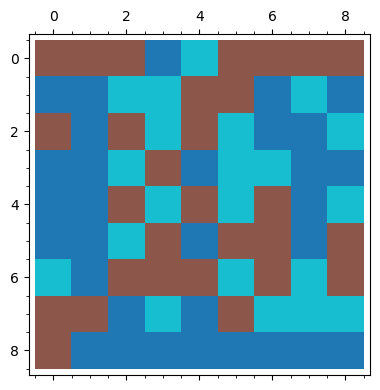


270 degree rotation


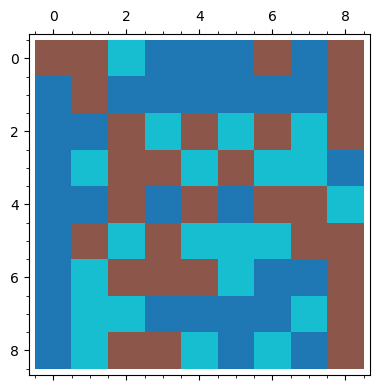


360 degree rotation


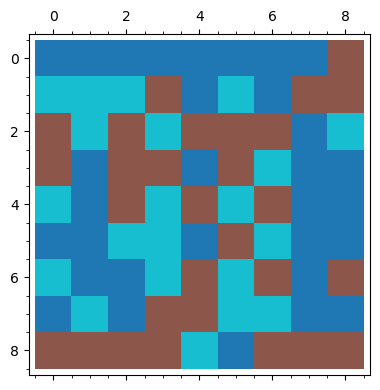

In [493]:
# Код реализующий повороты матрицы

matrix = create_coloring_matrix(7**41)
test_rotate(matrix, test_type="Coloring")

vertical asix mirror


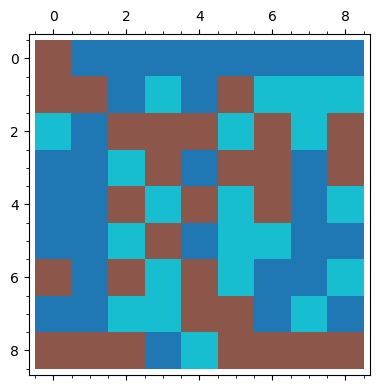


main_diagonal asix mirror


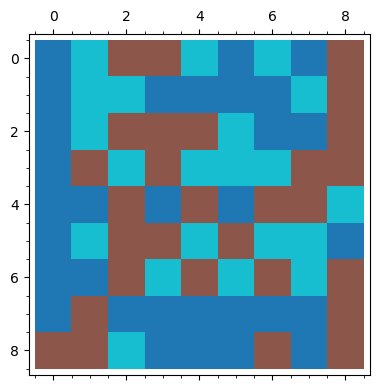


horizontal asix mirror


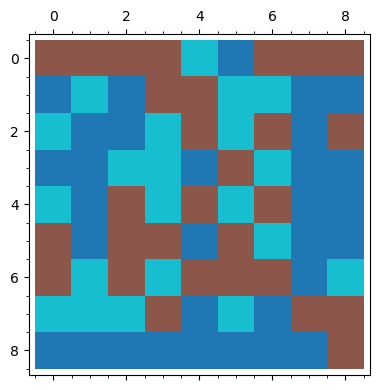


side_diagonal asix mirror


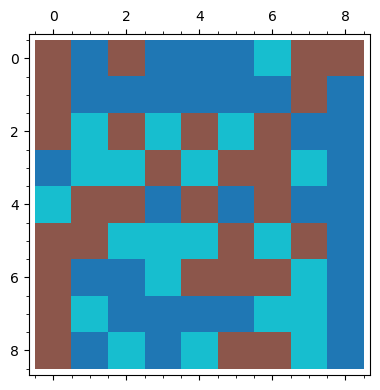

In [494]:
# Код реализующий отражения матрицы

matrix = create_coloring_matrix(7**41)
test_mirror(matrix, test_type="Coloring")

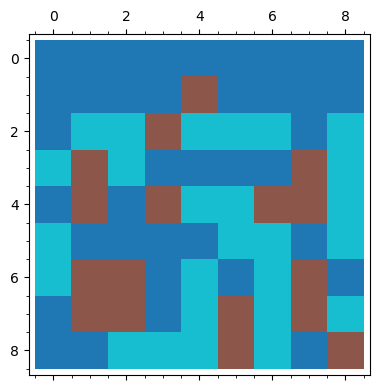

In [495]:
# Test 2

print_matrix(create_coloring_matrix(19**25), matrix_type="Coloring")

90 degree rotation


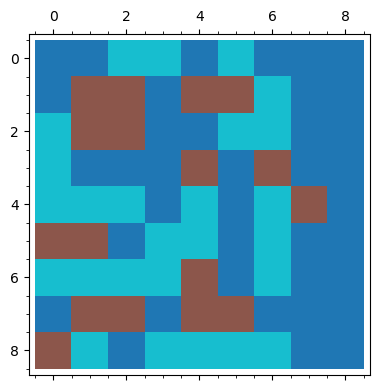


180 degree rotation


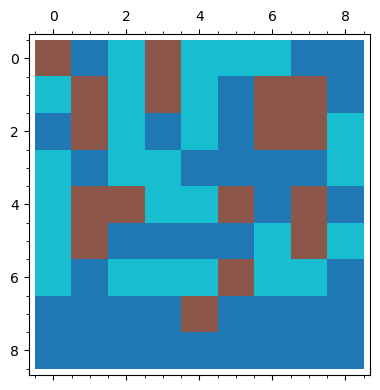


270 degree rotation


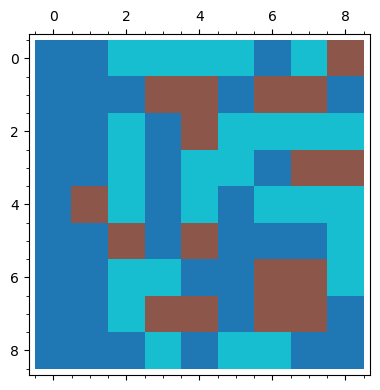


360 degree rotation


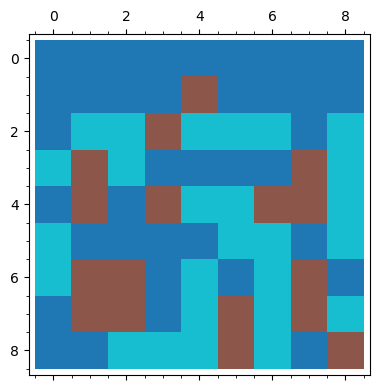

In [496]:
# Код реализующий повороты матрицы

matrix = create_coloring_matrix(19**25)
test_rotate(matrix, test_type="Coloring")

vertical asix mirror


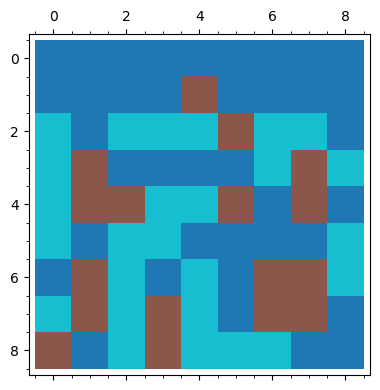


main_diagonal asix mirror


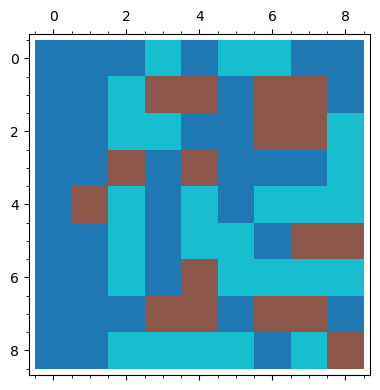


horizontal asix mirror


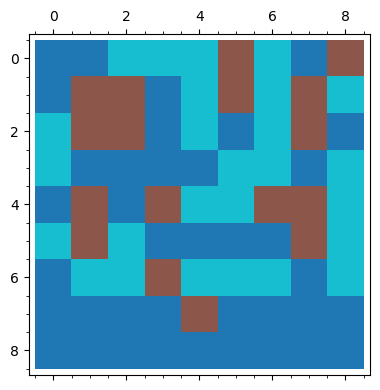


side_diagonal asix mirror


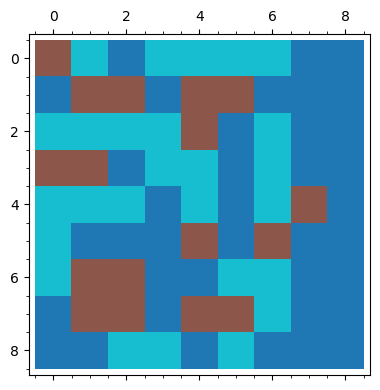

In [497]:
# Код реализующий отражения матрицы

matrix = create_coloring_matrix(19**25)
test_mirror(matrix, test_type="Coloring")

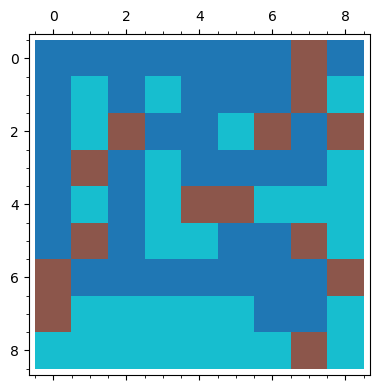

In [498]:
# Test 3

print_matrix(create_coloring_matrix(211**15 - 23), matrix_type="Coloring")

90 degree rotation


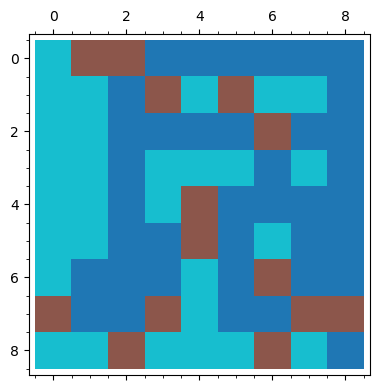


180 degree rotation


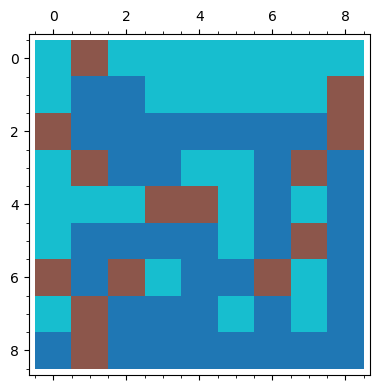


270 degree rotation


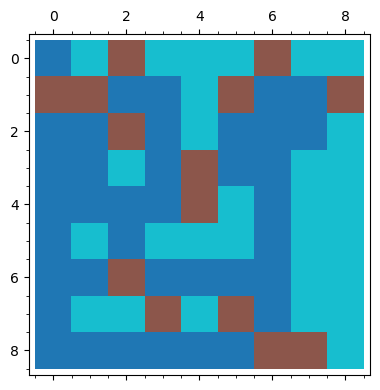


360 degree rotation


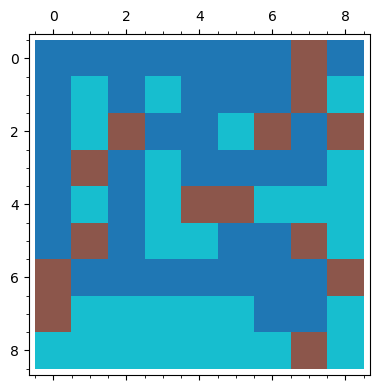

In [499]:
# Код реализующий повороты матрицы

matrix = create_coloring_matrix(211**15 - 23)
test_rotate(matrix, test_type="Coloring")

vertical asix mirror


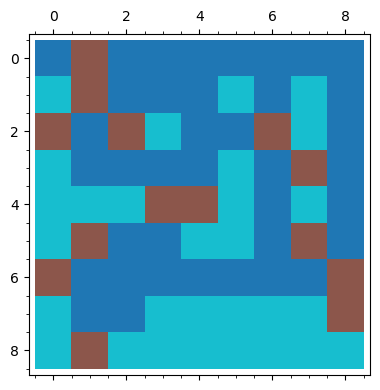


main_diagonal asix mirror


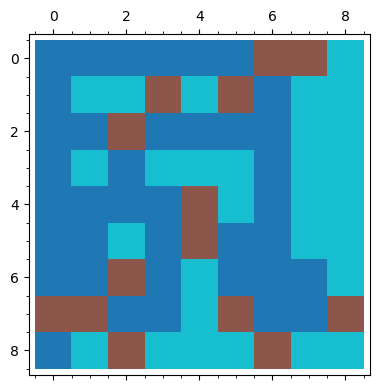


horizontal asix mirror


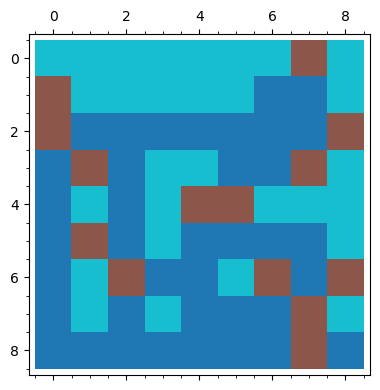


side_diagonal asix mirror


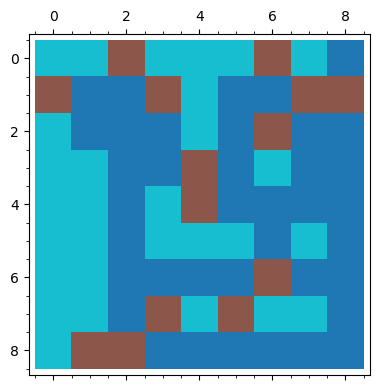

In [500]:
# Код реализующий отражения матрицы

matrix = create_coloring_matrix(211**15 - 23)
test_mirror(matrix, test_type="Coloring")

#### Вывод

Написали функцию создающую раскраску по заданному номеру. А также написали функцию ее графического отображения (<em>print_matrix</em>). Функцию протестировали на нескольких значениях, а также посмотрели на данную раскраску под действием всех элементов группы действий (вращений) мартицы. Для графического отображения использован встроенный функционал <em>sage</em> (<em>sage.plot.matrix_plot</em>).

## Выводы

Сформировано представления о задачах о раскрасках, выработано умение использовать лемму Бёрнсайда для решения задачи о раскрасках,привит навык использования систем компьютерной алгебры <em>SageMath</em> для реализации алгоритмов решения задачи.<br><br>
В ходе выполнения работы, была аналитически решена задача о раскрасках матрицы, а аналитические рассуждения подкреплены визуальным отображением матрицы. Также была написана функция раскраски матрицы по заданому номеру и для нее осуществлены все возможные действия над матрицей.
